In [24]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.decomposition import PCA # Principal Component Analysis module
from sklearn.cluster import KMeans # KMeans clustering 
import matplotlib.pyplot as plt # Python defacto plotting library
import seaborn as sns # More snazzy plotting library
%matplotlib inline 
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import chardet
from subprocess import check_output
print(check_output(["ls", "Matrix.csv"]).decode("Big5"))

Matrix.csv



In [23]:
with open("Matrix.csv",'rb') as f :
    text=f.read()
    encode=chardet.detect(text)
encode

{'confidence': 0.99, 'encoding': 'Big5', 'language': 'Chinese'}

In [25]:
movie = pd.read_csv('Matrix.csv',encoding="Big5")
movie.head()

,Unnamed: 0,到,及,可望,和,國巨,在,對,巨,已,...,與,華,表示,被動,調漲,達,部分,都,電子,需求
0,0,0.026882,0.027979,0.018104,0.021945,0.051021,0.071869,0.032368,0.014264,0.017556,...,0.022493,0.016458,0.018104,0.031820,0.041695,0.013715,0.011521,0.015361,0.012618,0.015361
1,1,0.034052,0.023715,0.020067,0.015202,0.060808,0.072361,0.019458,0.013986,0.021891,...,0.023715,0.030404,0.020675,0.040741,0.013378,0.020067,0.010337,0.015810,0.017634,0.012162
2,2,0.042018,0.018346,0.014203,0.018938,0.072200,0.082260,0.021897,0.018938,0.016570,...,0.024856,0.012428,0.020713,0.052670,0.027815,0.011244,0.018346,0.020713,0.018938,0.018938


In [26]:
str_list = [] # empty list to contain columns with strings
for colname, colvalue in movie.iteritems():
    if type(colvalue[1]) == str:
        str_list.append(colname)
#Get to the numeric columns by inversion
num_list = movie.columns.difference(str_list)

In [27]:
movie_num = movie[num_list]
movie_num.head()

,Unnamed: 0,到,及,可望,和,國巨,在,對,巨,已,...,與,華,表示,被動,調漲,達,部分,都,電子,需求
0,0,0.026882,0.027979,0.018104,0.021945,0.051021,0.071869,0.032368,0.014264,0.017556,...,0.022493,0.016458,0.018104,0.031820,0.041695,0.013715,0.011521,0.015361,0.012618,0.015361
1,1,0.034052,0.023715,0.020067,0.015202,0.060808,0.072361,0.019458,0.013986,0.021891,...,0.023715,0.030404,0.020675,0.040741,0.013378,0.020067,0.010337,0.015810,0.017634,0.012162
2,2,0.042018,0.018346,0.014203,0.018938,0.072200,0.082260,0.021897,0.018938,0.016570,...,0.024856,0.012428,0.020713,0.052670,0.027815,0.011244,0.018346,0.020713,0.018938,0.018938


In [28]:
movie_num = movie_num.fillna(value=0, axis=1)

In [29]:
X = movie_num.values
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

In [30]:
list(movie)

['Unnamed: 0',
 '到',
 '及',
 '可望',
 '和',
 '國巨',
 '在',
 '對',
 '巨',
 '已',
 '市場',
 '年',
 '後',
 '從',
 '成長',
 '持續',
 '新',
 '新科',
 '新高',
 '於',
 '是',
 '月',
 '有',
 '法人',
 '漲',
 '漲價',
 '漲幅',
 '為',
 '營收',
 '產品',
 '由',
 '的',
 '目前',
 '看',
 '第',
 '等',
 '約',
 '而',
 '股',
 '股價',
 '與',
 '華',
 '表示',
 '被動',
 '調漲',
 '達',
 '部分',
 '都',
 '電子',
 '需求']

In [31]:
# movie.plot(y = 'vote_average', x = 'runtime', kind = 'hexbin', gridsize=35, sharex=False, 
#            colormap='cubehelix', title='Hexbin of vote_average and runtime',figsize=(12,8))
# movie.plot(y ='vote_average', x = 'revenue', kind='hexbin', gridsize = 45, sharex = False,
#           colormap = 'cubehelix', title='Hexbin of vote_average and revenue', figsize = (12,8))

KeyError: 'runtime'

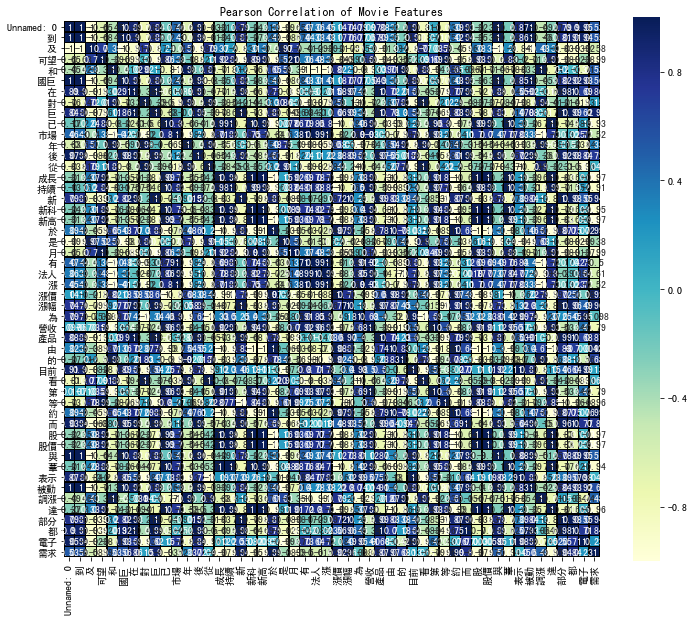

In [32]:
f, ax = plt.subplots(figsize=(12,10))
plt.title('Pearson Correlation of Movie Features')
sns.heatmap(movie_num.astype(float).corr(), linewidths=0.25, vmax=1.0, square=True,
           cmap="YlGnBu", linecolor='black', annot=True)

In [33]:
#Calculating Eigenvecors and eigenvalues of Covariance matrix
mean_vec = np.mean(X_std, axis=0)
cov_mat = np.cov(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

In [34]:
# Create a list of (eigenvalue, eigenvector) tuples
eig_pairs = [ (np.abs(eig_vals[i]),eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort from high to low
eig_pairs.sort(key = lambda x: x[0], reverse= True)

# Calculation of Explained Variance from the eigenvalues
tot = sum(eig_vals)
var_exp = [(i/tot)*100 for i in sorted(eig_vals, reverse=True)] # Individual explained variance
cum_var_exp = np.cumsum(var_exp) # Cumulative explained variance

In [35]:
cum_var_exp

array([ 56.63928824+0.00000000e+00j, 100.        +0.00000000e+00j,
       100.        +0.00000000e+00j, 100.        +0.00000000e+00j,
       100.        +1.71728492e-16j, 100.        +0.00000000e+00j,
       100.        +1.40492175e-16j, 100.        +0.00000000e+00j,
       100.        +3.07264268e-17j, 100.        +0.00000000e+00j,
       100.        +4.79565143e-16j, 100.        +0.00000000e+00j,
       100.        +4.21734761e-18j, 100.        +0.00000000e+00j,
       100.        +0.00000000e+00j, 100.        +1.41079292e-16j,
       100.        +0.00000000e+00j, 100.        +1.39645056e-16j,
       100.        +0.00000000e+00j, 100.        +5.45935703e-17j,
       100.        +0.00000000e+00j, 100.        +0.00000000e+00j,
       100.        +3.34238655e-16j, 100.        +0.00000000e+00j,
       100.        +2.10490175e-16j, 100.        +0.00000000e+00j,
       100.        +2.58283881e-17j, 100.        +0.00000000e+00j,
       100.        +9.87886800e-17j, 100.        +0.00000000e+

/Users/apple/anaconda3/envs/python3/lib/python3.5/site-packages/matplotlib/transforms.py:827: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.array(args, dtype=float).reshape(2, 2)
/Users/apple/anaconda3/envs/python3/lib/python3.5/site-packages/numpy/core/numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


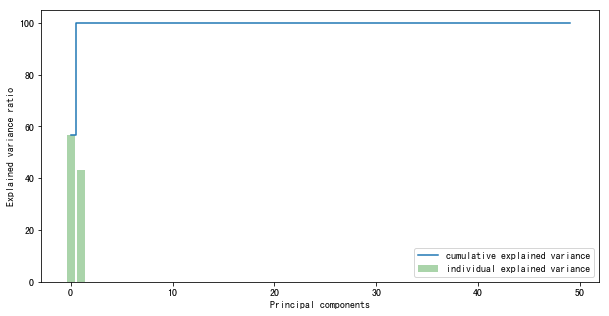

In [36]:
# PLOT OUT THE EXPLAINED VARIANCES SUPERIMPOSED 
plt.figure(figsize=(10, 5))
plt.bar(range(len(var_exp)), var_exp, alpha=0.3333, align='center', label='individual explained variance', color = 'g')
plt.step(range(len(cum_var_exp)), cum_var_exp, where='mid',label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()

In [37]:
movie_num.describe()

,Unnamed: 0,到,及,可望,和,國巨,在,對,巨,已,...,與,華,表示,被動,調漲,達,部分,都,電子,需求
count,3.0,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
mean,1.0,0.034317,0.023347,0.017458,0.018695,0.061343,0.075497,0.024574,0.015729,0.018672,...,0.023688,0.019763,0.019831,0.041744,0.027629,0.015009,0.013401,0.017295,0.016397,0.015487
std,1.0,0.007571,0.004827,0.002985,0.003378,0.010599,0.005863,0.006859,0.002782,0.002830,...,0.001181,0.009433,0.001495,0.010461,0.014159,0.004551,0.004323,0.002969,0.003337,0.003390
min,0.0,0.026882,0.018346,0.014203,0.015202,0.051021,0.071869,0.019458,0.013986,0.016570,...,0.022493,0.012428,0.018104,0.031820,0.013378,0.011244,0.010337,0.015361,0.012618,0.012162
25%,0.5,0.030467,0.021030,0.016154,0.017070,0.055914,0.072115,0.020678,0.014125,0.017063,...,0.023104,0.014443,0.019389,0.036280,0.020596,0.012480,0.010929,0.015586,0.015126,0.013761
50%,1.0,0.034052,0.023715,0.018104,0.018938,0.060808,0.072361,0.021897,0.014264,0.017556,...,0.023715,0.016458,0.020675,0.040741,0.027815,0.013715,0.011521,0.015810,0.017634,0.015361
75%,1.5,0.038035,0.025847,0.019085,0.020441,0.066504,0.077311,0.027132,0.016601,0.019723,...,0.024285,0.023431,0.020694,0.046706,0.034755,0.016891,0.014933,0.018262,0.018286,0.017149
max,2.0,0.042018,0.027979,0.020067,0.021945,0.072200,0.082260,0.032368,0.018938,0.021891,...,0.024856,0.030404,0.020713,0.052670,0.041695,0.020067,0.018346,0.020713,0.018938,0.018938


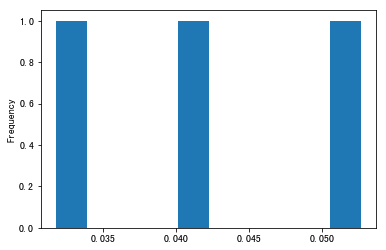

In [39]:
movie['被動'].plot.hist()

In [ ]:
movie